# HW4: Social Stocks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.listdir('.'))
#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'hw4'
#GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', 'DS101', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
#print(os.listdir(GOOGLE_DRIVE_PATH))

['.config', 'nvda.db', '.ipynb_checkpoints', 'openai_visits.csv', 'drive', 'sample_data']


In [3]:
import sqlite3

#TODO: establish connection to nvda.db
con = sqlite3.connect("nvda.db")

###Task 1:
Print out the table name(s) contained in nvda.db.

In [4]:
# TODO: ^, print the results in cursor by row
cursor = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
for row in cursor:
  print(row)

#cursor = con.execute("SELECT * from nvda_stock")
#for row in cursor:
# print(row)


('nvda_stock',)


### Task 2:
Fetch the NVDA stock data (date, open, high, low, close, adj close, volume) from '2023-07-10' to '2023-07-14', order them by volume (ascendent).

In [5]:
# TODO: ^, print the results in cursor by row
cursor = con.execute(
    '''
    SELECT DATE, OPEN, HIGH, LOW, CLOSE, "Adj Close", VOLUME from nvda_stock
    WHERE DATE >= '2023-07-10' AND DATE <= '2023-07-14'
    ORDER BY VOLUME ASC
    '''
)

for row in cursor:
  print(row)

('2023-07-11', 424.809998, 427.579987, 420.670013, 424.049988, 423.977753, 29824400)
('2023-07-10', 426.570007, 428.109985, 416.48999, 421.799988, 421.728149, 35390800)
('2023-07-13', 445.179993, 461.549988, 444.920013, 459.769989, 459.691711, 47820400)
('2023-07-12', 430.329987, 439.350006, 427.769989, 439.019989, 438.945221, 48127700)
('2023-07-14', 465.829987, 480.880005, 450.600006, 454.690002, 454.612579, 77066400)


### Task 3:
Fetch the stock data for dates that have the top 5 adjusted closing price, and organize them in descending order.

In [6]:
# TODO: ^, print the results in cursor by row
cursor = con.execute(
    '''
    SELECT DATE, OPEN, HIGH, LOW, CLOSE, "Adj Close", VOLUME from nvda_stock
    ORDER BY "Adj Close" DESC
    LIMIT 5
    '''
)

for row in cursor:
  print(row)


('2023-08-31', 493.799988, 497.440002, 489.579987, 493.549988, 493.465942, 52857000)
('2023-08-30', 490.440002, 499.269989, 484.25, 492.640015, 492.556122, 73520600)
('2023-08-29', 466.660004, 490.809998, 463.910004, 487.839996, 487.756927, 70139700)
('2023-09-05', 482.230011, 488.51001, 478.600006, 485.480011, 485.397369, 38265300)
('2023-09-01', 497.619995, 498.0, 481.420013, 485.089996, 485.007416, 46319100)


### Task 4:
Count the number of days where the openning price of the nvda stock is less than 200.

In [7]:
# TODO: ^
cursor = con.execute(
    '''
    SELECT COUNT(*) from nvda_stock
    WHERE OPEN < 200
    '''
)

for row in cursor:
  print(row)


(63,)


### Task 5:
Compute the average openning price of the nvda stock for days with a "High" of > 450.

In [8]:
# TODO: ^
cursor = con.execute(
    '''
    SELECT AVG(OPEN) from nvda_stock
    WHERE HIGH > 450
    '''
)

for row in cursor:
  print(row)


(461.505834625,)


### Task 6:
Load the nvda stock data between dates '2022-11-07' and '2023-02-04' to a DataFrame named as "stock_df".

In [9]:
import pandas as pd

In [10]:
# TODO: ^
stock_df = pd.read_sql_query(
    '''
    SELECT * from nvda_stock
    WHERE DATE >= '2022-11-07' AND DATE <= '2023-02-04'
    '''
, con)


In [11]:
 stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   Open       61 non-null     float64
 2   High       61 non-null     float64
 3   Low        61 non-null     float64
 4   Close      61 non-null     float64
 5   Adj Close  61 non-null     float64
 6   Volume     61 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB


In [12]:
con.commit()
con.close()

### Task 7:
Plot the 'High' and 'Low' prices vs "Date" using lineplot

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Text(0.5, 1.0, 'High and Low prices vs Date')

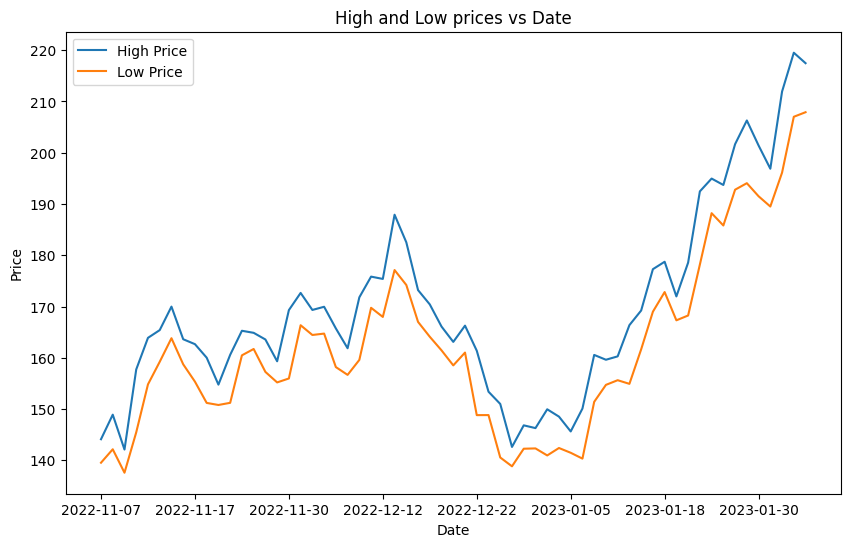

In [14]:
fg, ax = plt.subplots(figsize=(10, 6))
# TODO: Plot the high and low prices, set the ticker intervals, x & y labels, and the plot title
# Plot the high and low prices
sns.lineplot(data=stock_df, x='Date', y='High',label='High Price')
sns.lineplot(data=stock_df, x='Date', y='Low',label='Low Price')
# set the ticker intervals
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
# x & y labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
# plot title
ax.set_title('High and Low prices vs Date')


### Task 8:
Load openai_visits.csv to a DataFrame named as "visits_df".

This chart records worldwide visits to OpenAI.com from Nov 2022 to Feb 2023, and this period witnessed the sharp rise of ChatGPT and other generative applications.

In [15]:
# TODO: read csv to visits_df using Pandas
visits_df = pd.read_csv('openai_visits.csv')

In [16]:
# TODO: merge stock_df with visits_df to stock_df, using the 'Date' column as anchor
stock_df = pd.merge(stock_df, visits_df, on='Date', how='inner')


### Task 9:
in a single figure, plot the closing price of NVDA in lineplot, and number of OpenAI visits in barplot.

Text(0.5, 1.0, 'the closing price of NVDA and number of OpenAI visits')

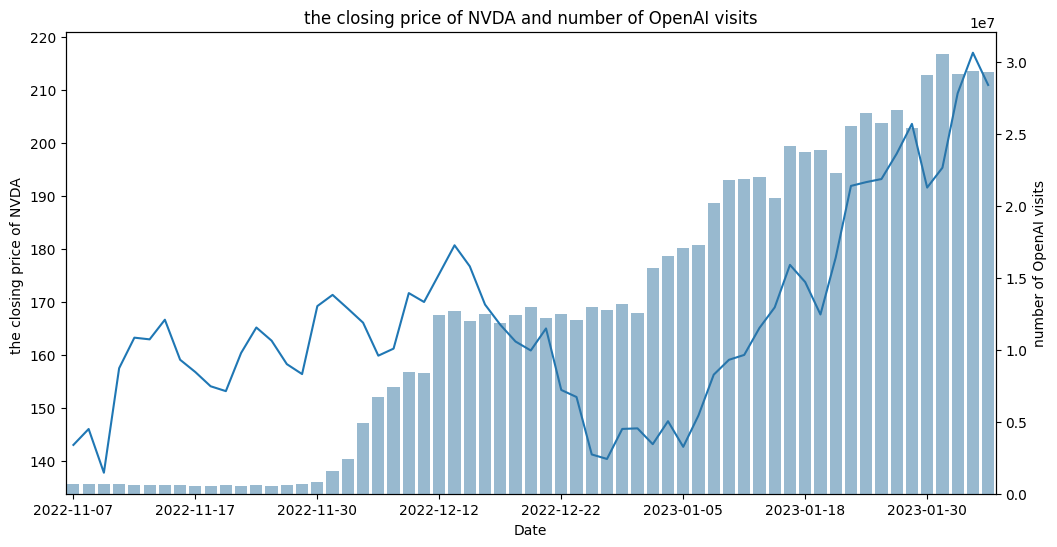

In [17]:
fg, ax1 = plt.subplots(figsize=(12,6))
# TODO: plot the stock closing price with lineplot in ax1
sns.lineplot(data=stock_df, x='Date', y='Close', ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('the closing price of NVDA ')

ax2 = ax1.twinx()
# TODO: plot the openai visits with barplot in ax2, set the x-axis ticker interval
sns.barplot(data=stock_df, x='Date', y='Visits', ax=ax2, alpha=0.5)
ax2.set_ylabel('number of OpenAI visits')
ax2.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
ax2.set_title('the closing price of NVDA and number of OpenAI visits')
